<a href="https://colab.research.google.com/github/HMBinara/ML_Project/blob/main/Health_%26_Fitness_Improvement_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [2]:
#Inmport unnessari Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error


Upload file

In [3]:
#Load the file
from google.colab import files
uploaded = files.upload()
data = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

Saving Sleep_health_and_lifestyle_dataset.csv to Sleep_health_and_lifestyle_dataset.csv


Data Preprocessing

In [4]:
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [5]:
#number of data points &number of features
data.shape

(374, 13)

In [6]:
#geting some the information about tha dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


##Catogarical Features:

--Gender

--Occupation

--BMI Category

--Blood Pressure

--Sleep Disorder

In [7]:
#Cheaking for missing Values
data.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


##Handling Missing Values

Replacing the missing Value in "Sleep Disorder" with mode

In [8]:
mode_of_Sleep_Disorder = data.pivot_table(values='Sleep Disorder', columns='Quality of Sleep', aggfunc=(lambda x: x.mode()[0]))
print(mode_of_Sleep_Disorder)


Quality of Sleep            4         5            6         7         8  \
Sleep Disorder    Sleep Apnea  Insomnia  Sleep Apnea  Insomnia  Insomnia   

Quality of Sleep            9  
Sleep Disorder    Sleep Apnea  


In [9]:
missing_value = data['Sleep Disorder'].isnull()
print(missing_value)

0       True
1       True
2       True
3      False
4      False
       ...  
369    False
370    False
371    False
372    False
373    False
Name: Sleep Disorder, Length: 374, dtype: bool


In [10]:
data.loc[missing_value, 'Sleep Disorder'] = data.loc[missing_value, 'Quality of Sleep'].apply(lambda x: mode_of_Sleep_Disorder[x])

In [11]:
data.isnull().sum()


,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


Data Analysis

In [12]:
#Statical mesure about the Data
data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


<Figure size 1000x500 with 0 Axes>

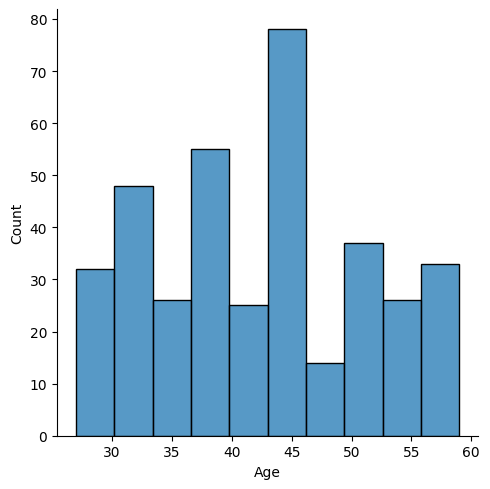

In [13]:
#Age Distribution
plt.figure(figsize=(10,5))
sns.displot(data['Age'])
plt.show()

<Figure size 600x600 with 0 Axes>

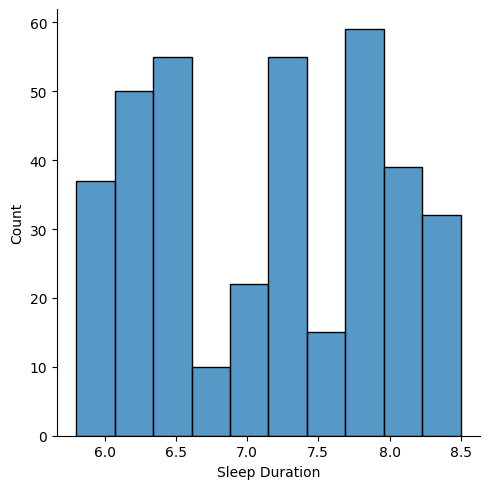

In [14]:
#Sleep Duration Distribution
plt.figure(figsize=(6,6))
sns.displot(data['Sleep Duration'])
plt.show()

<Figure size 1000x500 with 0 Axes>

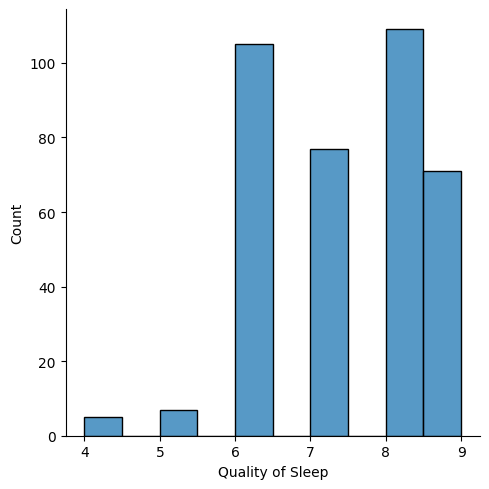

In [15]:
#Quality of Sleep Distribution
plt.figure(figsize=(10,5))
sns.displot(data['Quality of Sleep'])
plt.show()

<Figure size 600x600 with 0 Axes>

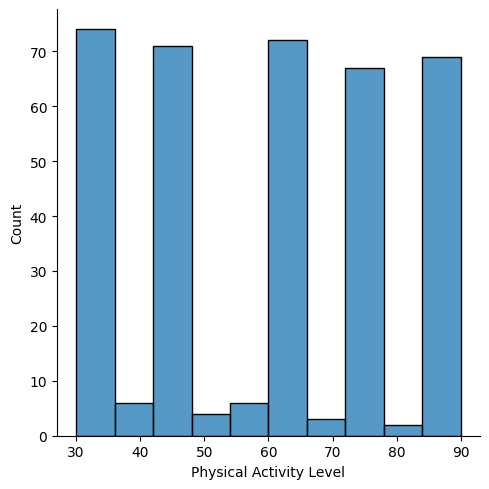

In [17]:
#Physical Activity Level Distribution
plt.figure(figsize=(6,6))
sns.displot(data['Physical Activity Level'])
plt.show()

<Figure size 600x600 with 0 Axes>

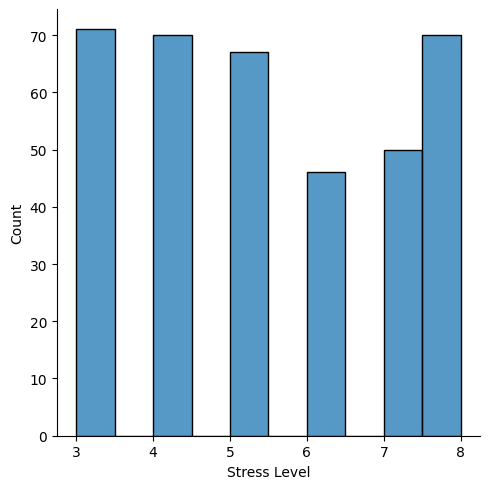

In [21]:
#Stress Level Distribution
plt.figure(figsize=(6,6))
sns.displot(data['Stress Level'])
plt.show()

<Figure size 600x600 with 0 Axes>

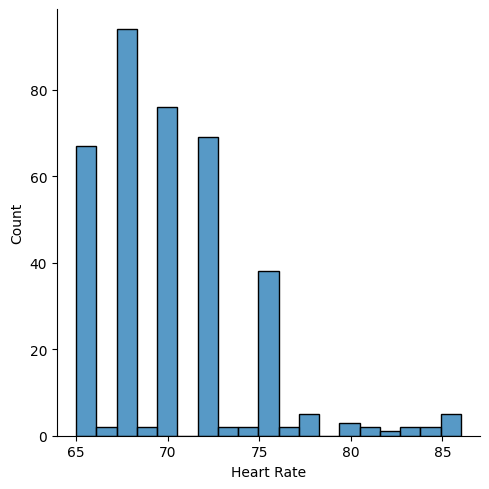

In [26]:
#Heart Rate Distribution
plt.figure(figsize=(6,6))
sns.displot(data['Heart Rate'])
plt.show()

<Figure size 600x600 with 0 Axes>

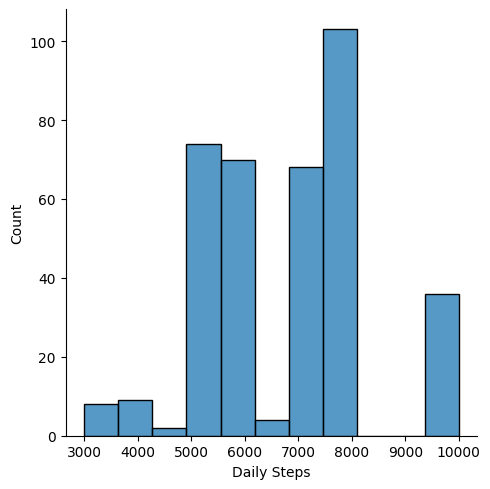

In [27]:
#Daily Steps Distribution
plt.figure(figsize=(6,6))
sns.displot(data['Daily Steps'])
plt.show()